<h1><font color="blue">데이터 그룹핑
 </font></h1>

<h2><font color="red">데이터 그룹화 
 
</font></h2>

<h3><font color="green">데이터 확인
</font></h3>

In [1]:
import pandas as pd
import numpy as np

In [2]:
payment = pd.read_csv('./../data/payment07.csv', encoding='cp949')
payment['성별'].unique()

array(['남자', '여자'], dtype=object)

In [3]:
payment

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,윤장혁,서울,7,영업부,남자,4000,2000
1,서문덕,서울,6,영업부,남자,3000,3000
2,이성진,부산,5,영업부,남자,3000,3000
3,강찬혁,부산,3,영업부,남자,1000,2000
4,신유석,서울,5,전산부,여자,2000,2000
5,유지혜,서울,5,전산부,여자,4000,1000
6,이유리,부산,8,전산부,여자,4000,1000
7,선진희,부산,6,전산부,여자,1000,4000


<h6><font color="BlueViolet">1) '성별'에 따른 '교통비' 집계
</font></h6>

In [8]:
mygrouping = payment.groupby('성별')['교통비']
mygrouping.sum().to_frame()

,교통비
성별,
남자,11000
여자,11000


In [10]:
mygrouping.count().to_frame()

,교통비
성별,
남자,4
여자,4


<h6><font color="BlueViolet">2) agg()를 사용한 집계 사용

</font></h6>

In [9]:
result = payment.groupby('성별')['출장기간'].agg('mean')
result.to_frame()

,출장기간
성별,
남자,5.25
여자,6.00


In [13]:
result = payment.groupby('성별').agg({'출장기간':'mean'})
result

,출장기간
성별,
남자,5.25
여자,6.00


In [14]:
result = payment.groupby('성별')['출장기간'].agg(np.mean)
result.to_frame()

,출장기간
성별,
남자,5.25
여자,6.00


<h6><font color="BlueViolet">3) 2개 이상의 컬럼에 대한 집계 사용

</font></h6>

In [15]:
payment['출장지역'].unique()

array(['서울', '부산'], dtype=object)

In [16]:
result = payment.groupby(['출장지역','성별'])['교통비'].agg('sum')
result.to_frame()

교통비
출장지역 성별      
부산   남자  4000
     여자  5000
서울   남자  7000
     여자  6000

In [18]:
result = payment.groupby(['출장지역','성별'])[['교통비','출장기간']].agg(['sum','mean'])
result

교통비         출장기간     
          sum    mean  sum mean
출장지역 성별                        
부산   남자  4000  2000.0    8  4.0
     여자  5000  2500.0   14  7.0
서울   남자  7000  3500.0   13  6.5
     여자  6000  3000.0   10  5.0

In [22]:
mydict={'교통비':['sum','mean','max'], '출장기간':['mean','min']}
result = payment.groupby(['출장지역','성별']).agg(mydict).astype(int)
result

교통비             출장기간    
          sum  mean   max mean min
출장지역 성별                           
부산   남자  4000  2000  3000    4   3
     여자  5000  2500  4000    7   6
서울   남자  7000  3500  4000    6   6
     여자  6000  3000  4000    5   5

<h2><font color="red">중첩 색인 제거하기 
 
</font></h2>

<h3><font color="green">데이터 확인
</font></h3>

In [50]:
payment = pd.read_csv('./../data/payment07.csv', encoding='cp949')
agg_dict = {'교통비':['sum','mean','max'], '출장기간':['mean','min']}
groupdata = payment.groupby(['출장지역','성별']).agg(agg_dict).astype(int)
groupdata

교통비             출장기간    
          sum  mean   max mean min
출장지역 성별                           
부산   남자  4000  2000  3000    4   3
     여자  5000  2500  4000    7   6
서울   남자  7000  3500  4000    6   6
     여자  6000  3000  4000    5   5

<h6><font color="BlueViolet">1) 중첩 색인 정보 확인
</font></h6>

In [51]:
groupdata.index

MultiIndex([('부산', '남자'),
            ('부산', '여자'),
            ('서울', '남자'),
            ('서울', '여자')],
           names=['출장지역', '성별'])

In [52]:
groupdata.columns

MultiIndex([( '교통비',  'sum'),
            ( '교통비', 'mean'),
            ( '교통비',  'max'),
            ('출장기간', 'mean'),
            ('출장기간',  'min')],
           )

In [53]:
outer_column = groupdata.columns.get_level_values(0)
outer_column

Index(['교통비', '교통비', '교통비', '출장기간', '출장기간'], dtype='object')

In [54]:
hangul_dict = {'sum':'총합','mean':'평균','max':'최대','min':'최소'}
inner_column = groupdata.columns.get_level_values(1)
inner_column = [hangul_dict[item] for item in inner_column.tolist()]
inner_column

['총합', '평균', '최대', '평균', '최소']

<h6><font color="BlueViolet">2) 중첩 색인의 단일화
</font></h6>

In [55]:
groupdata.columns = outer_column + '_' + inner_column
groupdata

교통비_총합  교통비_평균  교통비_최대  출장기간_평균  출장기간_최소
출장지역 성별                                          
부산   남자    4000    2000    3000        4        3
     여자    5000    2500    4000        7        6
서울   남자    7000    3500    4000        6        6
     여자    6000    3000    4000        5        5

In [56]:
groupdata.reset_index()

,출장지역,성별,교통비_총합,교통비_평균,교통비_최대,출장기간_평균,출장기간_최소
0,부산,남자,4000,2000,3000,4,3
1,부산,여자,5000,2500,4000,7,6
2,서울,남자,7000,3500,4000,6,6
3,서울,여자,6000,3000,4000,5,5


<h2><font color="red">agg() 함수 커스터마이징 
</font></h2>

<h3><font color="green">그룹별 비율 함수 구현
</font></h3>

<h6><font color="BlueViolet">1) 그룹별 비율 함수

</font></h6>

In [57]:
payment

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,윤장혁,서울,7,영업부,남자,4000,2000
1,서문덕,서울,6,영업부,남자,3000,3000
2,이성진,부산,5,영업부,남자,3000,3000
3,강찬혁,부산,3,영업부,남자,1000,2000
4,신유석,서울,5,전산부,여자,2000,2000
5,유지혜,서울,5,전산부,여자,4000,1000
6,이유리,부산,8,전산부,여자,4000,1000
7,선진희,부산,6,전산부,여자,1000,4000


<h6><font color="BlueViolet">2) 함수 만들기

</font></h6>

In [58]:
def get_range(x):
    return x.between(1500,3500).mean()

In [59]:
result = payment.groupby(['성별'])['교통비'].agg(get_range)
result.to_frame()

,교통비
성별,
남자,0.50
여자,0.25


<h6><font color="BlueViolet">3) 범용적 함수 만들기


</font></h6>

In [61]:
def get_range_pct(x, lower, upper):
    return x.between(lower,upper).mean()

In [65]:
LOWER, UPPER = 1500, 3500

# positional arguments
result = payment.groupby(['성별'])['교통비'].agg(get_range_pct, LOWER, UPPER)
result.to_frame()

,교통비
성별,
남자,0.50
여자,0.25


In [66]:
LOWER, UPPER = 1500, 3500

# keyword arguments
result = payment.groupby(['성별'])['교통비'].agg(get_range_pct, lower = LOWER, upper =UPPER)
result.to_frame()

,교통비
성별,
남자,0.50
여자,0.25


In [67]:
result = payment.groupby(['성별'])['교통비'].agg(get_range_pct, LOWER, upper =UPPER)
result.to_frame()

,교통비
성별,
남자,0.50
여자,0.25


<h2><font color="red">groupby 객체 살펴 보기 

</font></h2>

<h3><font color="green">DtaFrameGroupBy 객체

</font></h3>

In [69]:
payment

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,윤장혁,서울,7,영업부,남자,4000,2000
1,서문덕,서울,6,영업부,남자,3000,3000
2,이성진,부산,5,영업부,남자,3000,3000
3,강찬혁,부산,3,영업부,남자,1000,2000
4,신유석,서울,5,전산부,여자,2000,2000
5,유지혜,서울,5,전산부,여자,4000,1000
6,이유리,부산,8,전산부,여자,4000,1000
7,선진희,부산,6,전산부,여자,1000,4000


In [68]:
group_col = ['출장지역','성별','교통비']
grouped = payment.groupby(group_col)
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [75]:
print('보유하고 있는 속성과 메소드')
print([attr for attr in dir(grouped) if not attr.startswith('_')])

보유하고 있는 속성과 메소드
['agg', 'aggregate', 'all', 'any', 'apply', 'backfill', 'bfill', 'boxplot', 'corr', 'corrwith', 'count', 'cov', 'cumcount', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'dtypes', 'ewm', 'expanding', 'ffill', 'fillna', 'filter', 'first', 'get_group', 'groups', 'head', 'hist', 'idxmax', 'idxmin', 'indices', 'last', 'mad', 'max', 'mean', 'median', 'min', 'ndim', 'ngroup', 'ngroups', 'nth', 'nunique', 'ohlc', 'pad', 'pct_change', 'pipe', 'plot', 'prod', 'quantile', 'rank', 'resample', 'rolling', 'sample', 'sem', 'shift', 'size', 'skew', 'std', 'sum', 'tail', 'take', 'transform', 'tshift', 'value_counts', 'var', '교통비', '부서', '사원명', '성별', '식비', '출장기간', '출장지역']


In [80]:
grouped.groups

{('부산', '남자', 1000): [3], ('부산', '남자', 3000): [2], ('부산', '여자', 1000): [7], ('부산', '여자', 4000): [6], ('서울', '남자', 3000): [1], ('서울', '남자', 4000): [0], ('서울', '여자', 2000): [4], ('서울', '여자', 4000): [5]}

In [81]:
type(grouped.groups)

pandas.io.formats.printing.PrettyDict

In [79]:
# ngroups 속성을 사용하면 그룹의 개수, 즉 해당 객체가 출력해주는 그룹화된 묶음의 개수를 반환해 줍니다.
grouped.ngroups

8

In [82]:
type(grouped.ngroups)

int

In [84]:
print('보유하고 있는 속성과 메소드')
print([attr for attr in dir(grouped.groups) if not attr.startswith('_')])

보유하고 있는 속성과 메소드
['clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


In [85]:
groups = list(grouped.groups.keys())
groups

[('부산', '남자', 1000),
 ('부산', '남자', 3000),
 ('부산', '여자', 1000),
 ('부산', '여자', 4000),
 ('서울', '남자', 3000),
 ('서울', '남자', 4000),
 ('서울', '여자', 2000),
 ('서울', '여자', 4000)]

In [86]:
payment[group_col]

,출장지역,성별,교통비
0,서울,남자,4000
1,서울,남자,3000
2,부산,남자,3000
3,부산,남자,1000
4,서울,여자,2000
5,서울,여자,4000
6,부산,여자,4000
7,부산,여자,1000


In [88]:
result = grouped.get_group(('부산','남자',1000))
result

,사원명,출장지역,출장기간,부서,성별,교통비,식비
3,강찬혁,부산,3,영업부,남자,1000,2000


In [90]:
for item in grouped:
    print(item)
    break

(('부산', '남자', 1000),    사원명 출장지역  출장기간   부서  성별   교통비    식비
3  강찬혁   부산     3  영업부  남자  1000  2000)


In [97]:
cnt = 0
print('groupby 객체는 iterable 객체 이므로 반복문이 가능합니다.')
for key, value in grouped:
    print('키 :' , end ='')
    print(key)
    print('값 : \n' , end ='')
    display(value)
    cnt += 1
    if(cnt == 3):break

키 :('부산', '남자', 1000)
값 : 


,사원명,출장지역,출장기간,부서,성별,교통비,식비
3,강찬혁,부산,3,영업부,남자,1000,2000


키 :('부산', '남자', 3000)
값 : 


,사원명,출장지역,출장기간,부서,성별,교통비,식비
2,이성진,부산,5,영업부,남자,3000,3000


키 :('부산', '여자', 1000)
값 : 


,사원명,출장지역,출장기간,부서,성별,교통비,식비
7,선진희,부산,6,전산부,여자,1000,4000


<h2><font color="red">누가 누가 잘 하나? 
</font></h2>

<h3><font color="green">시험 성적 향상표 읽기
</font></h3>

In [100]:
jumsu_score = pd.read_csv('./../data/시험성적향상표.csv' , encoding ='cp949')
jumsu_score.head(10)

,이름,월,주,점수
0,김철수,1월,1주차,64
1,김철수,1월,2주차,65
2,김철수,1월,3주차,67
3,김철수,1월,4주차,67
4,김철수,2월,1주차,61
5,김철수,2월,2주차,62
6,김철수,2월,3주차,63
7,김철수,2월,4주차,64
8,김철수,3월,1주차,55
9,김철수,3월,2주차,55


In [101]:
result = jumsu_score.query('월 == "1월"')
result

,이름,월,주,점수
0,김철수,1월,1주차,64
1,김철수,1월,2주차,65
2,김철수,1월,3주차,67
3,김철수,1월,4주차,67
16,박영희,1월,1주차,78
17,박영희,1월,2주차,79
18,박영희,1월,3주차,81
19,박영희,1월,4주차,82


In [102]:
man = jumsu_score.query('이름=="김철수" and 월 in ["1월"]')
man

,이름,월,주,점수
0,김철수,1월,1주차,64
1,김철수,1월,2주차,65
2,김철수,1월,3주차,67
3,김철수,1월,4주차,67


In [103]:
man['점수'].to_frame()

,점수
0,64
1,65
2,67
3,67


In [104]:
def jumsu_rate(jumsu):
    # x는 매주의 시험 점수, x.iloc[0]는 1번째 주의 시험 점수
    return 100*(jumsu - jumsu.iloc[0]) / jumsu.iloc[0]
        # (해당주 점수 -1주차 점수) / 1주차점수

In [105]:
# 함수에 적용 해보기

result = jumsu_rate(man['점수'])
result.to_frame()

,점수
0,0.0000
1,1.5625
2,4.6875
3,4.6875


In [108]:
pct_jumsu_score = jumsu_score.groupby(['이름','월'])['점수'].transform(jumsu_rate)
result = pct_jumsu_score.head(8)
result.to_frame()

,점수
0,0.000000
1,1.562500
2,4.687500
3,4.687500
4,0.000000
5,1.639344
6,3.278689
7,4.918033


In [109]:
jumsu_score['향상_비율'] = pct_jumsu_score.round(4) #round = 반올림 / round(4) = 소수점 4자리에서 반올림
result = jumsu_score.query('이름=="김철수"')
result.head(8)

,이름,월,주,점수,향상_비율
0,김철수,1월,1주차,64,0.0000
1,김철수,1월,2주차,65,1.5625
2,김철수,1월,3주차,67,4.6875
3,김철수,1월,4주차,67,4.6875
4,김철수,2월,1주차,61,0.0000
5,김철수,2월,2주차,62,1.6393
6,김철수,2월,3주차,63,3.2787
7,김철수,2월,4주차,64,4.9180


In [110]:
week4 = jumsu_score.query('주=="4주차"')
week4

,이름,월,주,점수,향상_비율
3,김철수,1월,4주차,67,4.6875
7,김철수,2월,4주차,64,4.9180
11,김철수,3월,4주차,55,0.0000
15,김철수,4월,4주차,54,1.8868
19,박영희,1월,4주차,82,5.1282
23,박영희,2월,4주차,89,5.9524
27,박영희,3월,4주차,84,2.4390
31,박영희,4월,4주차,88,3.5294


In [111]:
week4copy = week4.copy()
month_unique = week4copy['월'].unique()
month_unique

array(['1월', '2월', '3월', '4월'], dtype=object)

In [114]:
winner = week4copy.pivot(index='월', columns='이름', values='향상_비율')
winner

이름,김철수,박영희
월,,
1월,4.6875,5.1282
2월,4.9180,5.9524
3월,0.0000,2.4390
4월,1.8868,3.5294


In [115]:
winner['성적우수자']= np.where(winner['김철수']> winner['박영희'],
                         '김철수','박영희')
winner

이름,김철수,박영희,성적우수자
월,,,
1월,4.6875,5.1282,박영희
2월,4.9180,5.9524,박영희
3월,0.0000,2.4390,박영희
4월,1.8868,3.5294,박영희


<h2><font color="red">연속형 변수의 범주화와 그룹핑 
</font></h2>

In [117]:
welfare = pd.read_csv('./../data/welfareCleanNew.csv', encoding='cp949')
welfare.columns

Index(['성별', '생일', '결혼 유무', '종교 유무', '직업 코드', '소득', '지역구', '나이', '직업', '연령대',
       '점수', '신용'],
      dtype='object')

In [118]:
welfare['결혼 유무'].unique()

array(['무응답', '이혼', '결혼'], dtype=object)

In [119]:
chartdata = welfare.groupby('결혼 유무')['소득'].mean()
chartdata.to_frame()

,소득
결혼 유무,
결혼,259.935812
무응답,198.124863
이혼,196.780643


In [120]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

Text(0.5, 1.0, '평균소득')

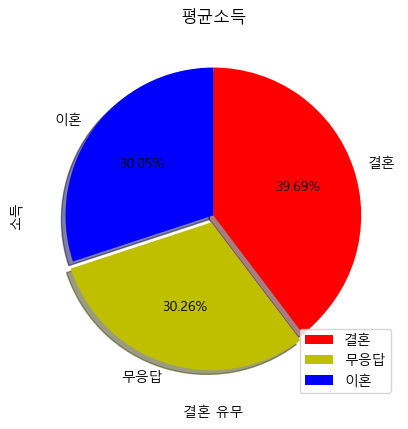

In [124]:
mylabel = chartdata.index
mycolors = ['r','y','b']
chartdata.plot(kind='pie', labels=mylabel, shadow=True , explode=(0, 0.05, 0),
                colors=mycolors, autopct='%1.2f%%', startangle=90, counterclock=False)

plt.grid(True)
plt.legend(loc=4)
plt.xlabel(chartdata.index.name)
plt.title('평균' + chartdata.name)

Text(0.5, 1.0, '산점도 : 소득 vs 나이')

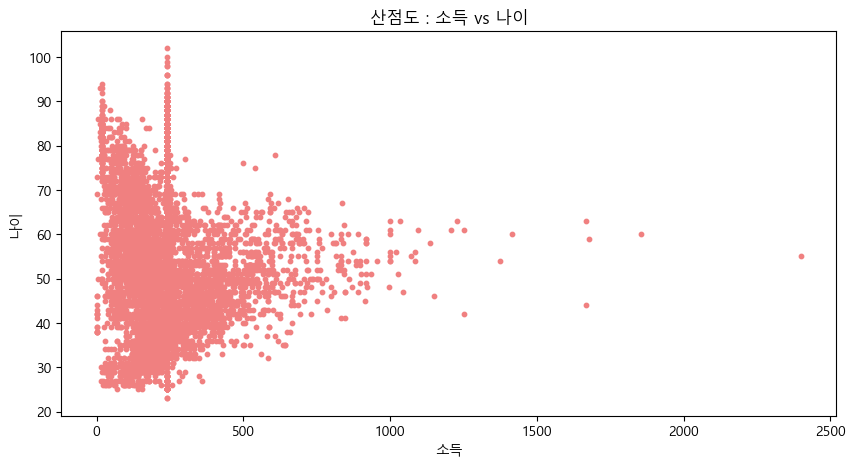

In [126]:
welfare.plot(kind='scatter',x='소득',y='나이',c='LightCoral',
            s=10, figsize=(10,5))

plt.title('산점도 : 소득 vs 나이')

Text(0.5, 1.0, '결혼 유무별 소득(박스 플롯)')

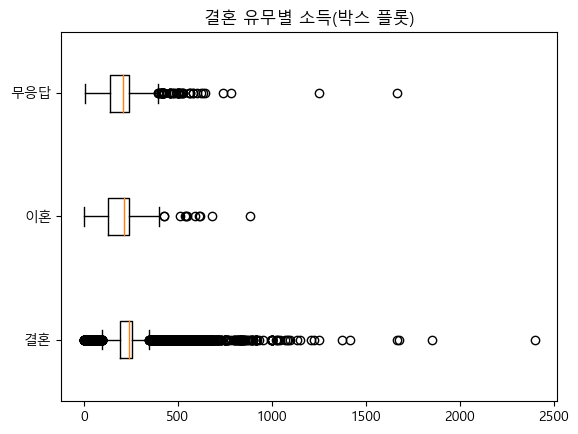

In [129]:
plt.boxplot(x=[welfare[welfare['결혼 유무']=='결혼']['소득'],
               welfare[welfare['결혼 유무']=='이혼']['소득'],
               welfare[welfare['결혼 유무']=='무응답']['소득']], 
         labels=['결혼', '이혼', '무응답'], vert=False)

plt.title('결혼 유무별 소득(박스 플롯)')

In [132]:
welfare['소득'].describe().to_frame()

,소득
count,7529.000000
mean,241.619016
std,144.679991
min,0.000000
25%,162.600000
50%,241.619016
75%,241.619016
max,2400.000000


In [135]:
welfare['소득'].sort_values(ascending=False).head(20).to_frame()

,소득
881,2400.00
7136,1853.30
7250,1678.70
5484,1666.70
2409,1666.66
4740,1416.70
5488,1374.00
5485,1250.00
7526,1250.00
4747,1226.70


In [137]:
welfare = welfare.loc[welfare['소득'] <= 1200]
print(str(welfare['소득'].max()))
print(str(welfare['소득'].min()))

1150.0
0.0


Text(0.5, 0, '소득')

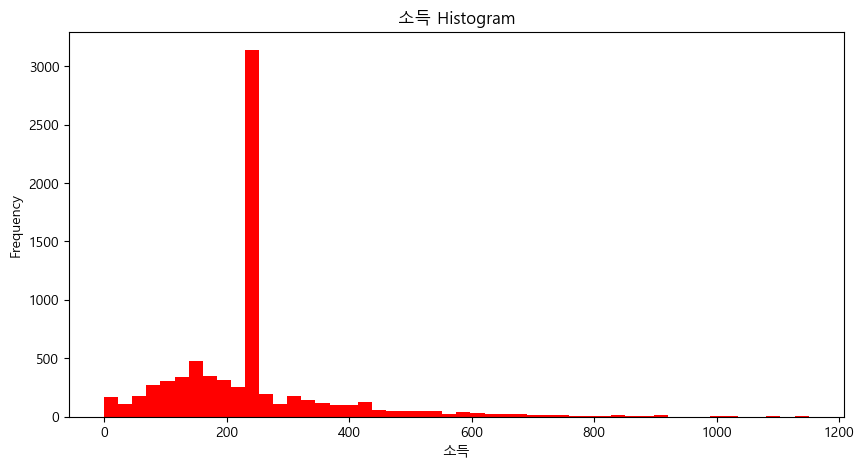

In [139]:
welfare['소득'].plot(kind='hist', bins = 50, color = 'r', figsize = (10,5))
plt.title('소득 Histogram')
plt.xlabel('소득')

In [140]:
print(str(welfare['소득'].max()))
print(str(welfare['소득'].min()))

1150.0
0.0


In [141]:
bins = [-np.inf, 200, 500, 700, 1000, np.inf]
cuts = pd.cut(welfare['소득'], bins=bins)
cuts.head()

0     (-inf, 200.0]
1    (200.0, 500.0]
2     (-inf, 200.0]
3     (-inf, 200.0]
4     (-inf, 200.0]
Name: 소득, dtype: category
Categories (5, interval[float64, right]): [(-inf, 200.0] < (200.0, 500.0] < (500.0, 700.0] < (700.0, 1000.0] < (1000.0, inf]]

In [142]:
cuts.value_counts().to_frame()

,소득
"(200.0, 500.0]",4657
"(-inf, 200.0]",2473
"(500.0, 700.0]",280
"(700.0, 1000.0]",98
"(1000.0, inf]",10


In [143]:
result = 100 * welfare.groupby(cuts)['성별'].value_counts(normalize=True).round(4)
result.to_frame()

성별
소득              성별        
(-inf, 200.0]   여성   68.62
                남성   31.38
(200.0, 500.0]  남성   62.47
                여성   37.53
(500.0, 700.0]  남성   83.57
                여성   16.43
(700.0, 1000.0] 남성   89.80
                여성   10.20
(1000.0, inf]   남성  100.00

In [145]:
result = welfare.groupby(cuts)['소득'].quantile(q=[.25,.5,.75]).round(4)
result.to_frame()

소득
소득                             
(-inf, 200.0]   0.25    81.2000
                0.50   129.1000
                0.75   160.8000
(200.0, 500.0]  0.25   241.6190
                0.50   241.6190
                0.75   258.3000
(500.0, 700.0]  0.25   530.0000
                0.50   579.0000
                0.75   625.2075
(700.0, 1000.0] 0.25   750.0000
                0.50   821.6000
                0.75   888.4725
(1000.0, inf]   0.25  1035.5750
                0.50  1076.4500
                0.75  1092.4750

In [147]:
labels=['저소득','중저소득','중중소득','중고소득','고소득']
cuts_label = pd.cut(welfare['소득'], bins=bins, labels=labels)

strincome='범주형소득'
welfare[strincome] = cuts_label
welfare[['성별','지역구','나이','소득',strincome]].head()

,성별,지역구,나이,소득,범주형소득
0,남성,서울,73,120.0,저소득
1,남성,서울,76,220.2,중저소득
2,남성,서울,75,139.0,저소득
3,남성,서울,68,150.0,저소득
4,남성,서울,61,166.0,저소득


In [150]:
chartdata = welfare.groupby(['성별','범주형소득'])['소득'].mean()
chartdata = chartdata.reset_index()
chartdata

,성별,범주형소득,소득
0,남성,저소득,132.813144
1,남성,중저소득,277.966875
2,남성,중중소득,586.030470
3,남성,중고소득,820.022273
4,남성,고소득,1074.030000
5,여성,저소득,114.459034
6,여성,중저소득,252.843971
7,여성,중중소득,563.363261
8,여성,중고소득,833.383000
9,여성,고소득,NaN


In [152]:
chartdata = chartdata.pivot(index='성별', columns='범주형소득', values='소득')
chartdata

범주형소득,저소득,중저소득,중중소득,중고소득,고소득
성별,,,,,
남성,132.813144,277.966875,586.030470,820.022273,1074.03
여성,114.459034,252.843971,563.363261,833.383000,NaN


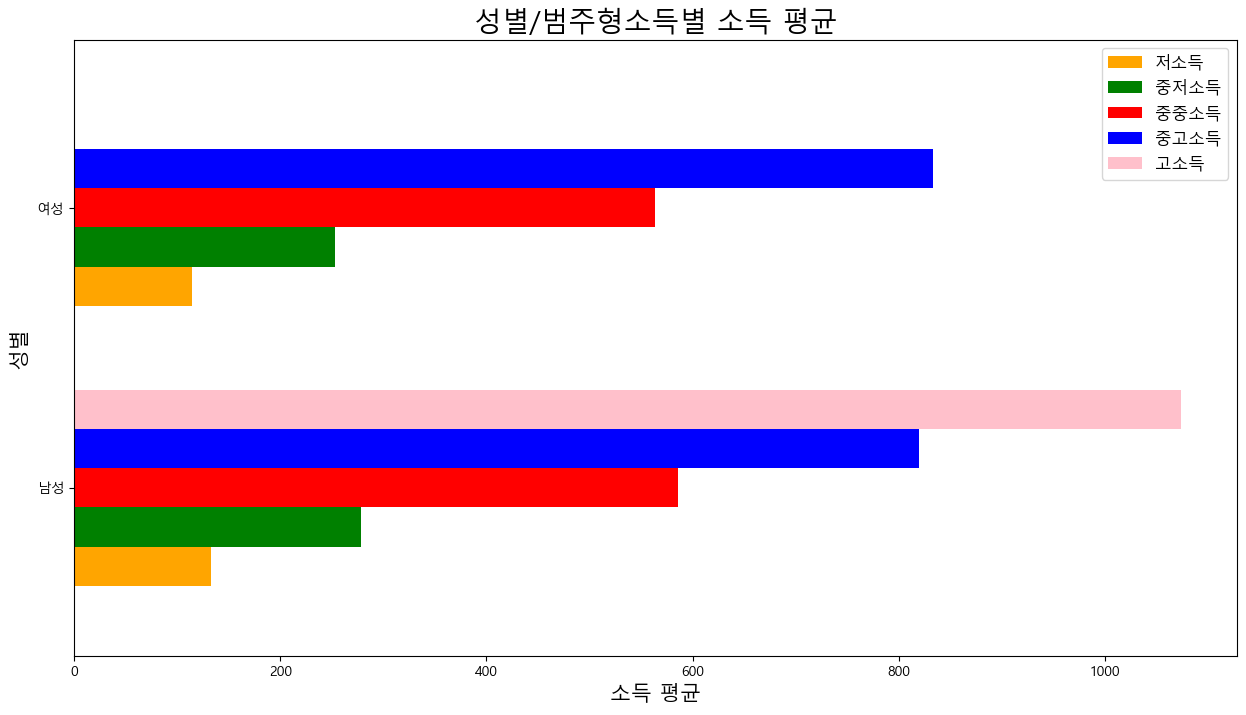

In [158]:
chartdata.plot(kind='barh', figsize=(15,8), width=0.7, color=['orange','green','red','blue','pink'])

plt.title('성별/범주형소득별 소득 평균', size=20)
plt.ylabel('성별', size=15)
plt.xlabel('소득 평균', size=15)
plt.legend(loc='best', fontsize=12)

In [159]:
payment = pd.read_csv('./../data/payment07.csv', encoding='cp949')
payment

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,윤장혁,서울,7,영업부,남자,4000,2000
1,서문덕,서울,6,영업부,남자,3000,3000
2,이성진,부산,5,영업부,남자,3000,3000
3,강찬혁,부산,3,영업부,남자,1000,2000
4,신유석,서울,5,전산부,여자,2000,2000
5,유지혜,서울,5,전산부,여자,4000,1000
6,이유리,부산,8,전산부,여자,4000,1000
7,선진희,부산,6,전산부,여자,1000,4000


In [160]:
payment['rank']=payment.groupby('부서')['교통비'].rank(method='first', ascending=False)
payment

,사원명,출장지역,출장기간,부서,성별,교통비,식비,rank
0,윤장혁,서울,7,영업부,남자,4000,2000,1.0
1,서문덕,서울,6,영업부,남자,3000,3000,2.0
2,이성진,부산,5,영업부,남자,3000,3000,3.0
3,강찬혁,부산,3,영업부,남자,1000,2000,4.0
4,신유석,서울,5,전산부,여자,2000,2000,3.0
5,유지혜,서울,5,전산부,여자,4000,1000,1.0
6,이유리,부산,8,전산부,여자,4000,1000,2.0
7,선진희,부산,6,전산부,여자,1000,4000,4.0


In [161]:
result = payment[payment['rank']==1.0]
result

,사원명,출장지역,출장기간,부서,성별,교통비,식비,rank
0,윤장혁,서울,7,영업부,남자,4000,2000,1.0
5,유지혜,서울,5,전산부,여자,4000,1000,1.0


In [162]:
result = result.drop(columns=['rank'])
result

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,윤장혁,서울,7,영업부,남자,4000,2000
5,유지혜,서울,5,전산부,여자,4000,1000
